In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
!pip install wordcloud



Access is denied.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline


ModuleNotFoundError: No module named 'wordcloud'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

sns.set(style="whitegrid")
%matplotlib inline


In [7]:
data = pd.read_csv("netflix1.csv")

data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
data.info()

print("Number of duplicate rows:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
Number of duplicate rows: 0


In [11]:
data = data.drop_duplicates()

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

required_columns = ['director', 'country'] 
existing_columns = [col for col in required_columns if col in data.columns]
data.dropna(subset=existing_columns, inplace=True)

if 'rating' in data.columns:
    data['rating'].fillna('Not Rated', inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


C:\Users\krish\AppData\Local\Temp\ipykernel_16000\1361052712.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna('Not Rated', inplace=True)


In [12]:
if 'rating' in data.columns:
    data['rating'] = data['rating'].fillna('Not Rated')

In [13]:
data = data.drop_duplicates()

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

required_columns = ['director', 'country'] 
existing_columns = [col for col in required_columns if col in data.columns]
data.dropna(subset=existing_columns, inplace=True)

if 'rating' in data.columns:
    data['rating'].fillna('Not Rated', inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


C:\Users\krish\AppData\Local\Temp\ipykernel_16000\3197550.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna('Not Rated', inplace=True)


In [14]:
data = data.drop_duplicates()

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

required_columns = ['director', 'country']
existing_columns = [col for col in required_columns if col in data.columns]
data.dropna(subset=existing_columns, inplace=True)

if 'rating' in data.columns:
    data['rating'] = data['rating'].fillna('Not Rated')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


C:\Users\krish\AppData\Local\Temp\ipykernel_16000\1060851790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, hue=None, palette='Set2')


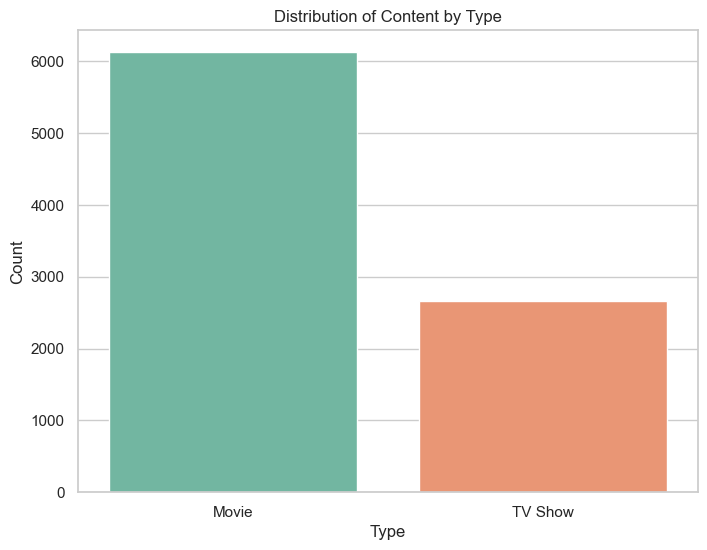

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data, hue=None, palette='Set2')  
plt.title("Distribution of Content by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color='skyblue')  # single color
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


NameError: name 'genre_counts' is not defined

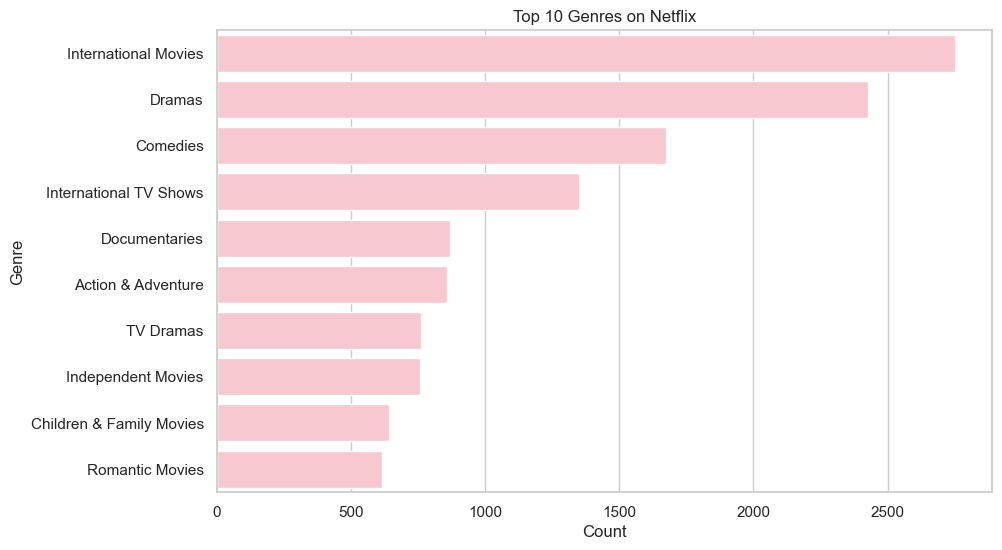

In [25]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(", "))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color='pink')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_16000\3845443546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


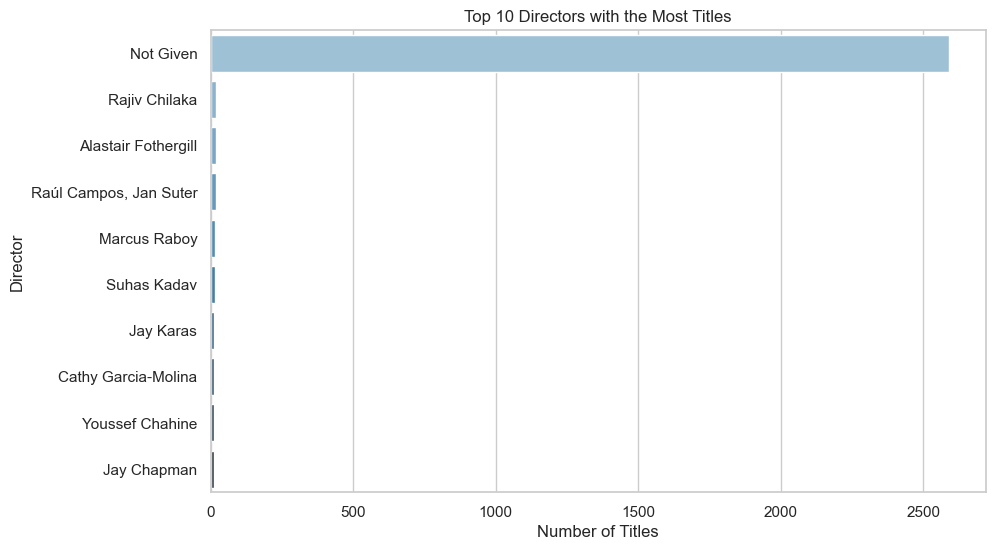

In [26]:
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors with the Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16000\2517931203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='lightgreen')


ValueError: 'lightgreen' is not a valid palette name

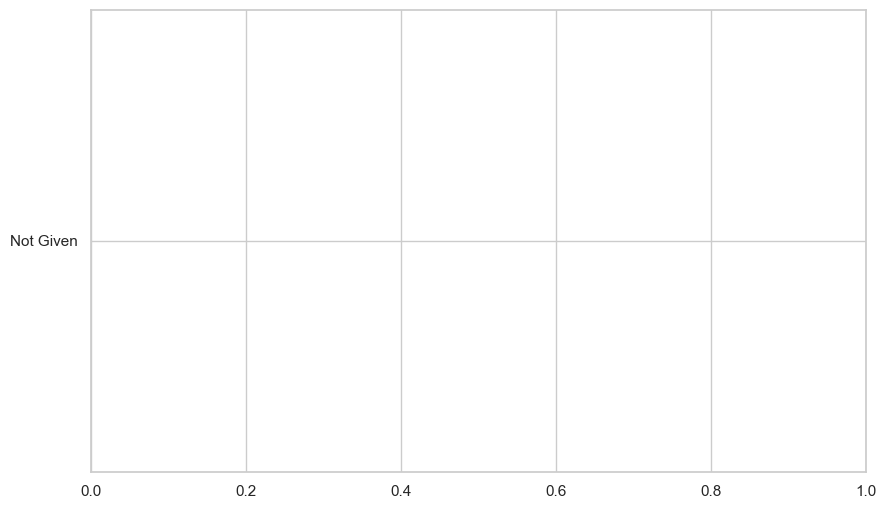

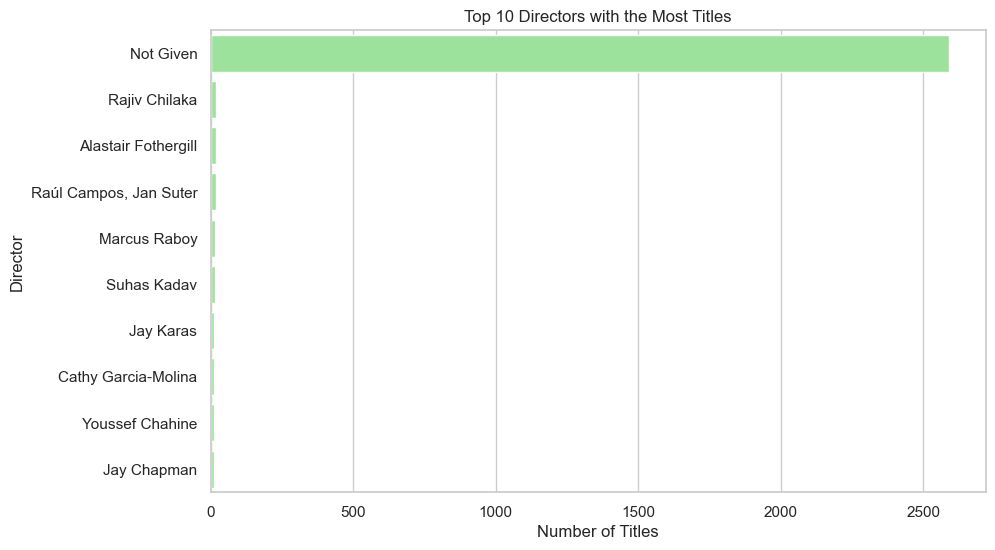

In [28]:
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, color='lightgreen')
plt.title("Top 10 Directors with the Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


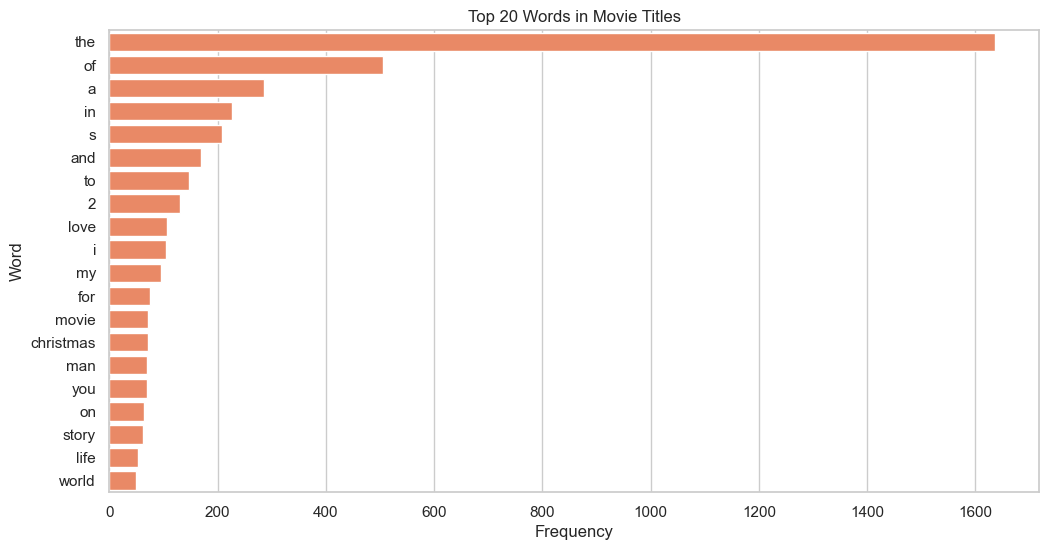

In [31]:
titles = " ".join(data[data['type']=='Movie']['title']).lower()
words = re.findall(r'\b\w+\b', titles)
top_words = Counter(words).most_common(20)
words_list, counts = zip(*top_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words_list), color='coral')  
plt.title("Top 20 Words in Movie Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


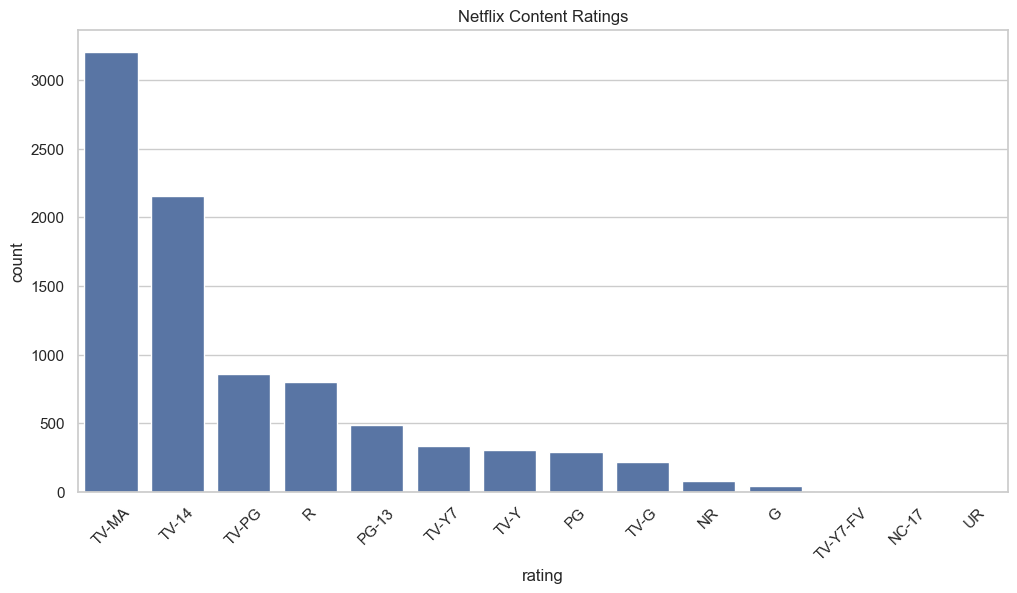

In [32]:
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating','count']

plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='count', data=ratings)
plt.xticks(rotation=45)
plt.title("Netflix Content Ratings")
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16000\2444156998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


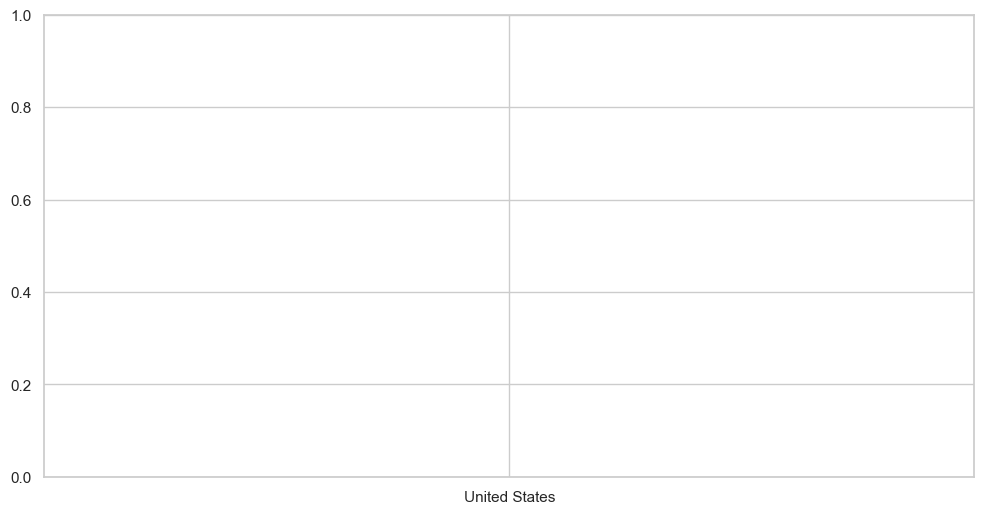

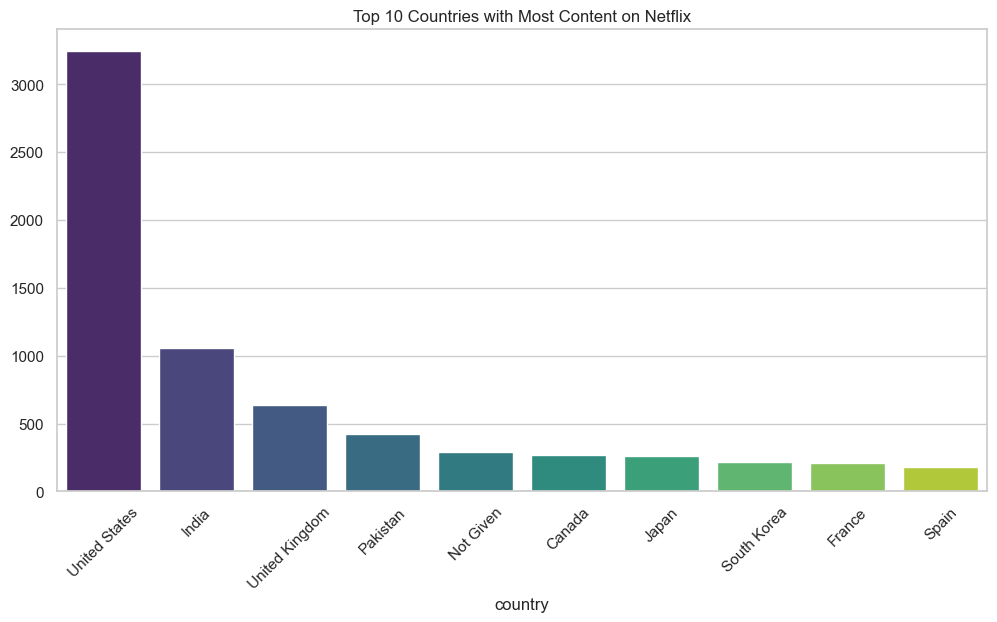

In [35]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_16000\2444156998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


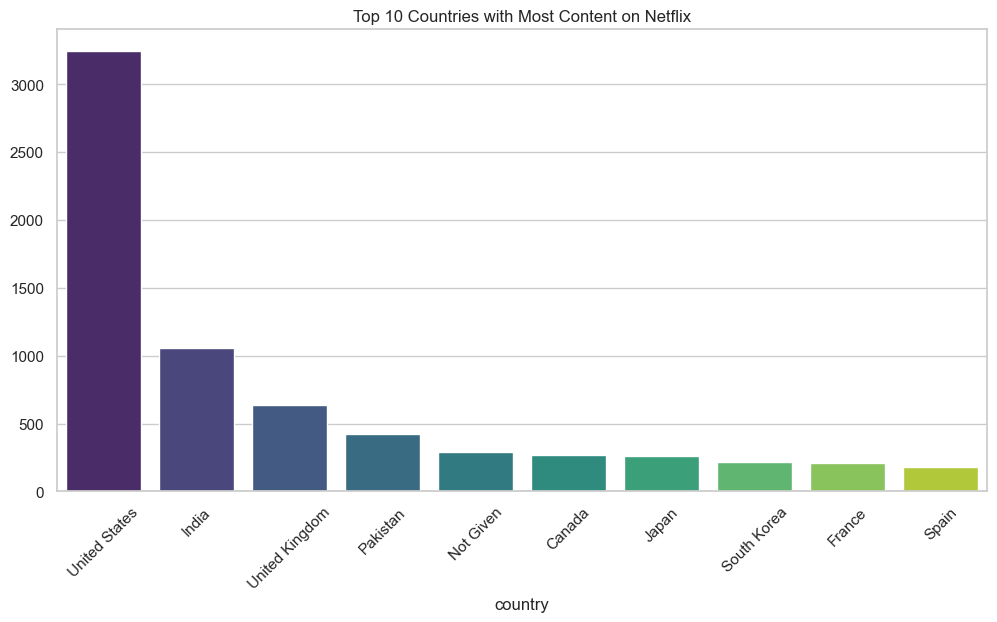

In [36]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()

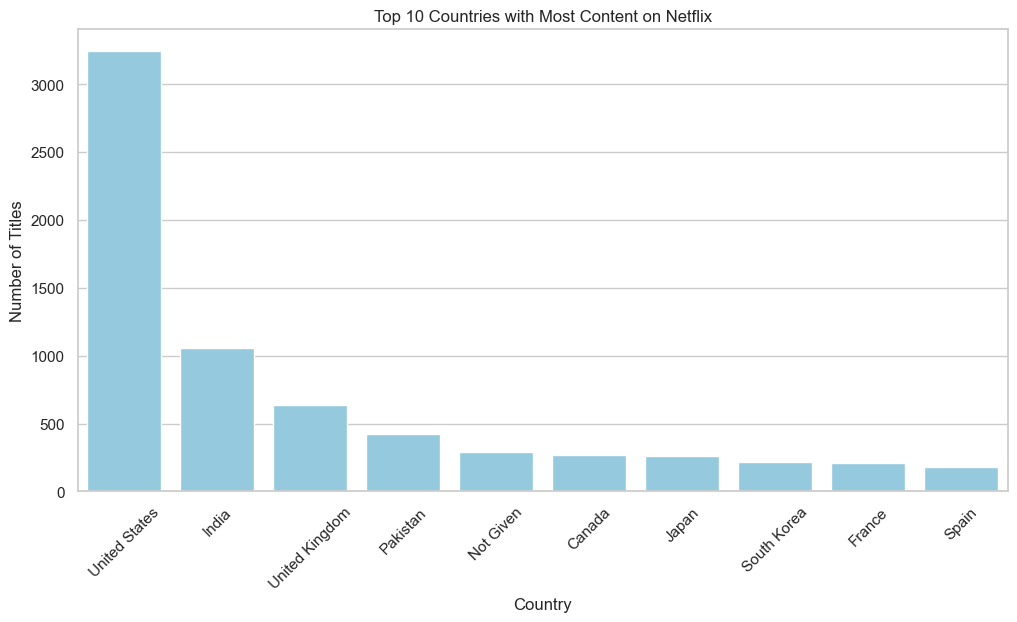

In [37]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, color='skyblue')  
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

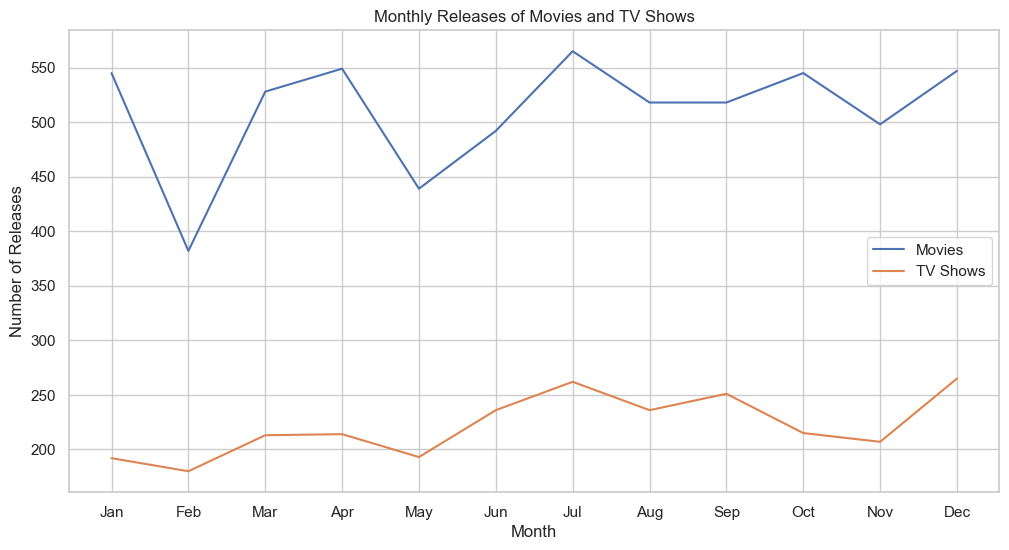

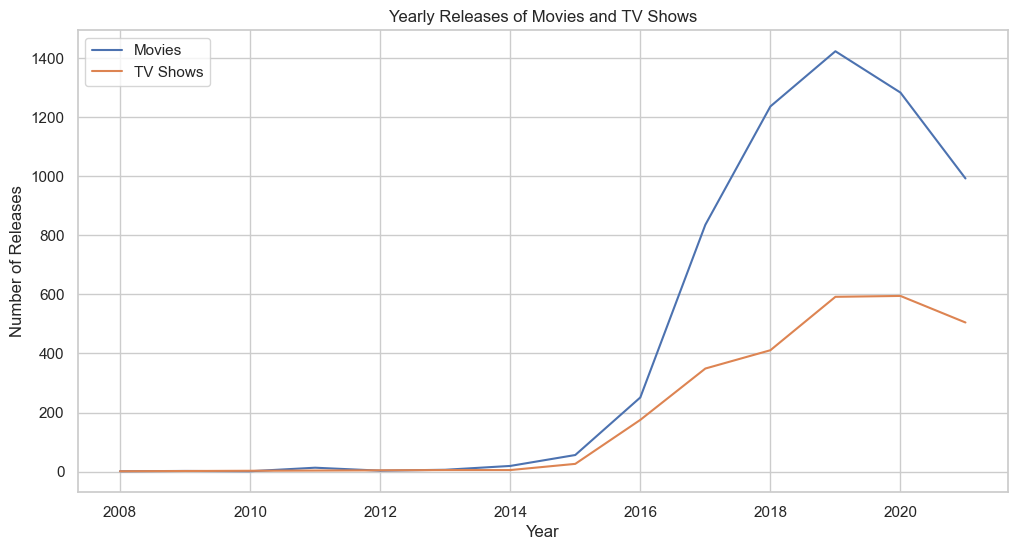

In [38]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

monthly_movies = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_tv = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_movies.index, monthly_movies.values, label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Releases of Movies and TV Shows")
plt.legend()
plt.grid(True)
plt.show()

yearly_movies = data[data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_tv = data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies')
plt.plot(yearly_tv.index, yearly_tv.values, label='TV Shows')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Yearly Releases of Movies and TV Shows")
plt.legend()
plt.grid(True)
plt.show()


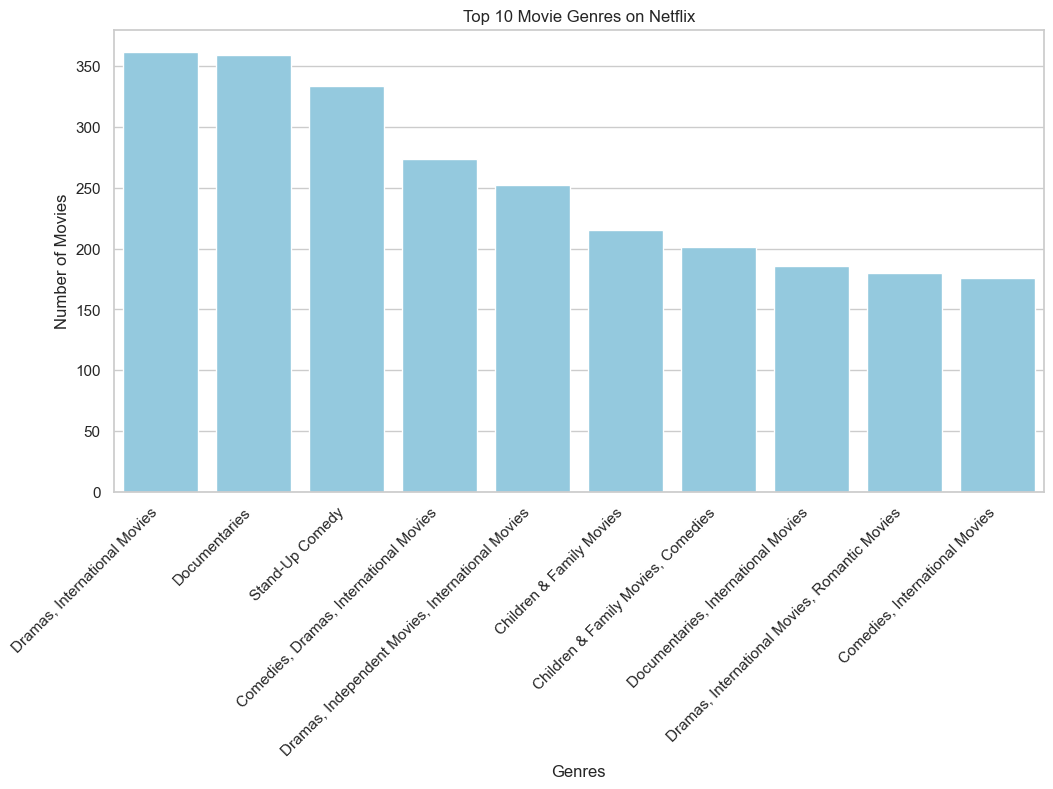

In [39]:
popular_movie_genre = data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Top 10 Movie Genres on Netflix")
plt.show()


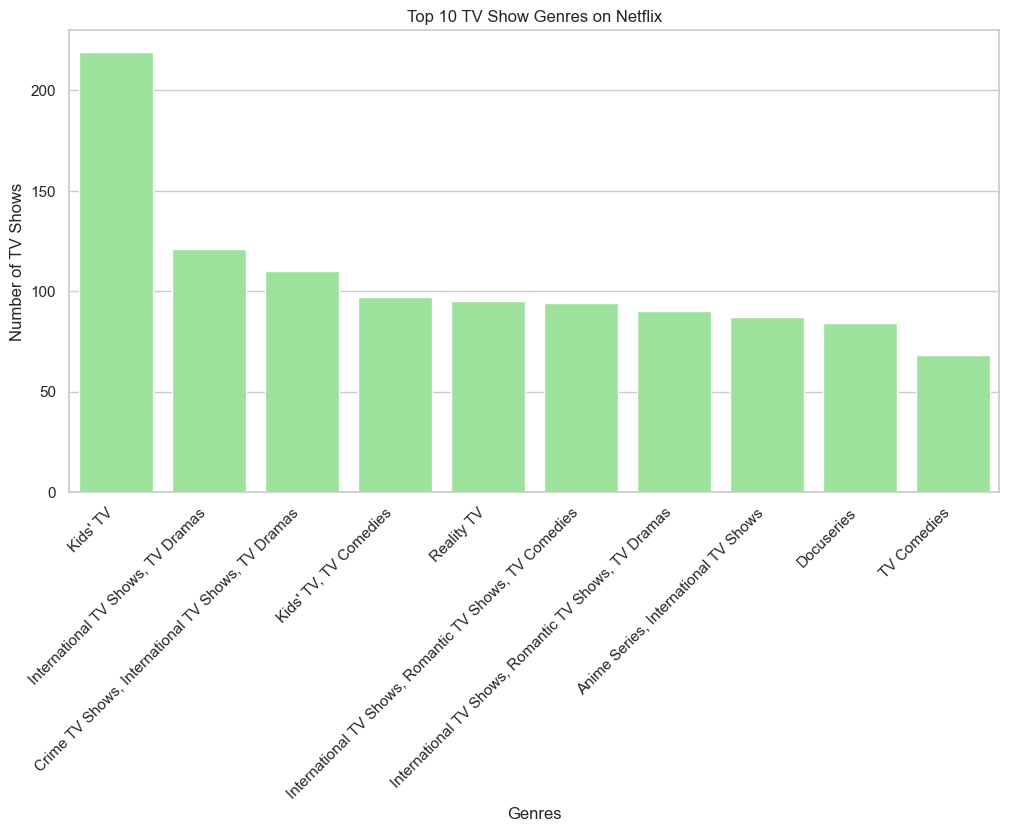

In [40]:
popular_tv_genre = data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(x=popular_tv_genre.index, y=popular_tv_genre.values, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Number of TV Shows")
plt.title("Top 10 TV Show Genres on Netflix")
plt.show()


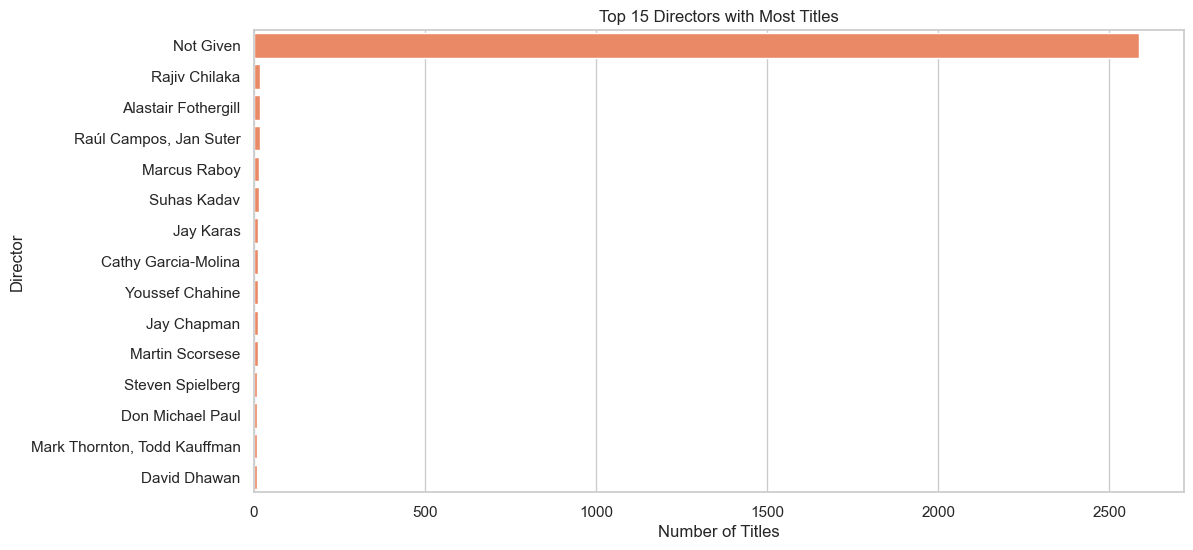

In [41]:
top_directors = data['director'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, color='coral')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 15 Directors with Most Titles")
plt.show()


In [42]:
data.to_excel("netflix_cleaned.xlsx", index=False)

In [43]:
data.to_csv("netflix_cleaned.csv", index=False)